In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = 'data/data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(data)

print(df)

      X         Y
0   273  1.007380
1   283  1.001290
2   293  0.998830
3   303  0.998020
4   313  0.998004
5   323  0.998540
6   333  0.999430
7   343  1.000670
8   353  1.002290
9   363  1.004370
10  373  1.006970


In [4]:
# Step 2: Prepare the data
X = df[['X']]  # Feature matrix
y = df['Y']    # Target vector

In [16]:
# Step 3: Transform the features into polynomial features
degree = 2  # Change this to the desired degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [17]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [18]:
# Step 5: Create and train the linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [20]:
# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 7.901111153439388e-06
R^2 Score: 0.41325768325523526


In [21]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [ 0.00000000e+00 -1.62795515e-03  2.59315838e-06]
Intercept: 1.2536802613644609


/home/tux/test/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


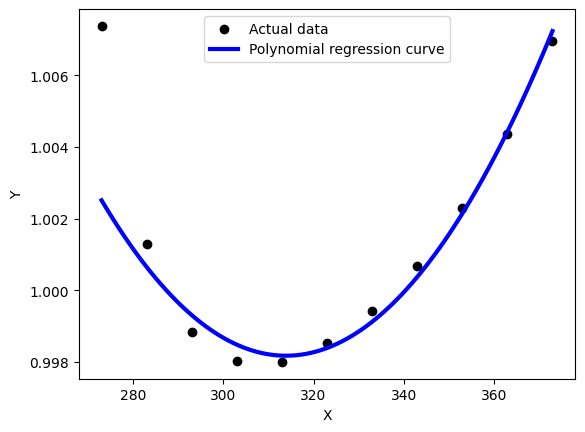

In [22]:
# Optionally, visualize the results
# Generate a range of values for X to plot the polynomial curve
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X, y, color='black', label='Actual data')
plt.plot(X_range, y_range_pred, color='blue', linewidth=3, label='Polynomial regression curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()